In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stat


import statsmodels.graphics.gofplots as plots


plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["font.size"] = 14
plt.rcParams["font.weight"] = "bold"
plt.style.use("seaborn-whitegrid")

In [5]:
# import the data
df = pd.read_csv("data/insurance.csv")
print(f"Shape of the dataset {df.shape}")

df.head()

Shape of the dataset (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


This dataset contains the 1338 observation and 7 independent variable.

<ul>
<li><p>age: age of primary beneficiary </p></li>
<li><p>sex: insurance contractor gender, female, male </p></li>
<li><p>bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,<br>
        objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 </p></li>
<li><p>children: Number of    children covered by health insurance / Number of dependents</p></li>
<li><p>smoker: Smoking</p></li>
<li><p>region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.</p></li>
<li><p>charges: Individual medical costs billed by health insurance</p></li>
</ul>

Here we are going to predict the **individual medical cost billed be the health insurance(y / dependent variable)**

Remaining other 6 variable are the independent variable.



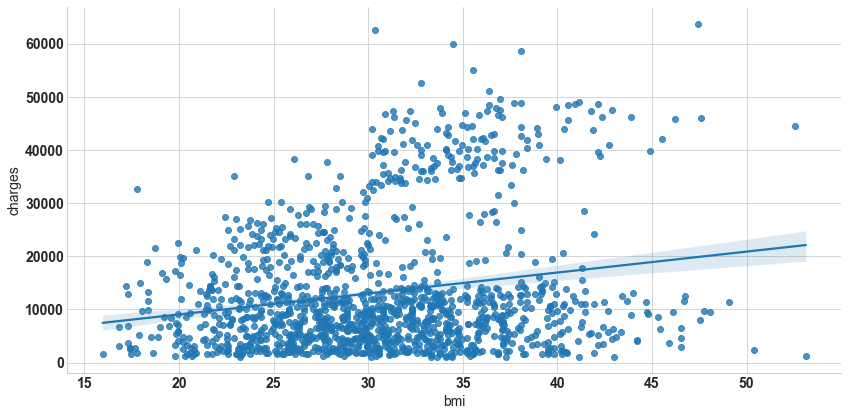

In [6]:
sns.lmplot(x="bmi",
          y="charges",
          data=df,
          height=6,
          aspect=2,
      )
plt.show()

#  Exploratory  Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df[df.select_dtypes(include="object").columns] =df[df.select_dtypes(include="object").columns].astype("category")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Trying to find distribution of the data

[Distribution_fitting](http://localhost:8888/notebooks/MyWork/Learning/Statistisx/Distribution%20Fiiting.ipynb#Sturge's-rule)

In [11]:
from scipy.stats._continuous_distns import _distn_names
import warnings

In [12]:
from scipy.stats._discrete_distns import _distn_names as discrete_dist

In [13]:
discrete_dist

['binom',
 'bernoulli',
 'betabinom',
 'nbinom',
 'geom',
 'hypergeom',
 'nhypergeom',
 'logser',
 'poisson',
 'planck',
 'boltzmann',
 'randint',
 'zipf',
 'zipfian',
 'dlaplace',
 'skellam',
 'yulesimon',
 'nchypergeom_fisher',
 'nchypergeom_wallenius']

In [14]:
common_distribution = ["uniform","norm","expon","t","chi2"]

In [15]:
def best_distribution(data,bins=200,ax=None):
    "To find the best fit distribution of data/"
    
    # getting the histogram of original data
    y,x = np.histogram(data,bins,density=True)
    x = (x + np.roll(x,-1))[:-1] / 2.0
    
    # best fit holder
    best_distributions = [] 
    
    #for i ,distribution in enumerate(common_distribution):
    for i ,distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):
        
        
        print("{:>3} / {:<3}: {}".format( i+1, len(_distn_names), distribution ))

        
        #Getting the distribution
        distribution = getattr(stat,distribution)
        
        # Trying to fit the data
        
        try:
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore")
                
                # fit the distribution
                params = distribution.fit(data)
                
                # separating parts of params
                
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # calculate the pdf for random variable x
                pdf = distribution.pdf(x,*arg,loc=loc,scale =scale)
                
                # finding the sse to find best fi
                sse = ((y - pdf)**2).sum()
                
                best_distributions.append((distribution,params,sse))
                
        except Exception:
            pass
        
    return sorted(best_distributions,key=lambda x : x[-1])
                
            
        

In [16]:
def make_pdf(dist, params, size=10000):
    """Generate distribution's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [17]:
def cal_bins_sturge_rule(data):
    return int(1 + np.ceil(np.log2(len(data))))

In [18]:
def cal_bins_freedman_rule(data):
    iqr = stat.iqr(data,interpolation="midpoint")
    bins_width = (2 * iqr) / (len(data)**(1/3))
    return int((np.ceil(data.max() - data.min()))/bins_width)

In [19]:
data = df["age"]


Text(0.5, 1.0, 'bins 10')

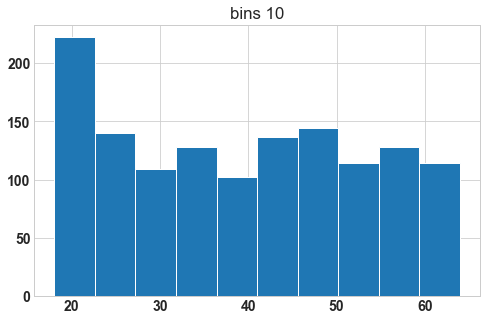

In [20]:
bins= cal_bins_freedman_rule(data)
data.hist(bins=bins)
plt.title(f"bins {bins}")

In [21]:
best_distributions = best_distribution(data,10)

  1 / 104: ksone
  2 / 104: kstwo
  3 / 104: kstwobign
  4 / 104: norm
  5 / 104: alpha
  6 / 104: anglit
  7 / 104: arcsine
  8 / 104: beta
  9 / 104: betaprime
 10 / 104: bradford
 11 / 104: burr
 12 / 104: burr12
 13 / 104: fisk
 14 / 104: cauchy
 15 / 104: chi
 16 / 104: chi2
 17 / 104: cosine
 18 / 104: dgamma
 19 / 104: dweibull
 20 / 104: expon
 21 / 104: exponnorm
 22 / 104: exponweib
 23 / 104: exponpow
 24 / 104: fatiguelife
 25 / 104: foldcauchy
 26 / 104: f
 27 / 104: foldnorm
 28 / 104: weibull_min
 29 / 104: weibull_max
 30 / 104: genlogistic
 31 / 104: genpareto
 32 / 104: genexpon
 33 / 104: genextreme
 34 / 104: gamma
 35 / 104: erlang
 36 / 104: gengamma
 37 / 104: genhalflogistic
 38 / 104: genhyperbolic
 39 / 104: gompertz
 40 / 104: gumbel_r
 41 / 104: gumbel_l
 42 / 104: halfcauchy
 43 / 104: halflogistic
 44 / 104: halfnorm
 45 / 104: hypsecant
 46 / 104: gausshyper
 47 / 104: invgamma
 48 / 104: invgauss
 49 / 104: geninvgauss
 50 / 104: norminvgauss
 51 / 104: 

In [26]:
best_distributions

[(<scipy.stats._continuous_distns.beta_gen at 0x1e13eb3d970>,
  (0.7623414141373606,
   0.9256564746831222,
   17.999999999999996,
   46.00426544685342),
  9.020206382868943e-05),
 (<scipy.stats._continuous_distns.rdist_gen at 0x1e13ebe3b20>,
  (1.5465393096621514, 41.52952018725462, 23.529520187254622),
  0.00018232502575153673),
 (<scipy.stats._continuous_distns.kappa4_gen at 0x1e13ebdb0d0>,
  (1.0814048298300312,
   1.025990500343121,
   14.153676866528766,
   51.146951094080535),
  0.00019104100924472773),
 (<scipy.stats._continuous_distns.bradford_gen at 0x1e13eb4a1c0>,
  (1.0424779551557326, 17.999998515577268, 46.00000307973059),
  0.0001913281904268188),
 (<scipy.stats._continuous_distns.johnsonsb_gen at 0x1e13ebc03a0>,
  (0.16679319224161102,
   0.46012635940336544,
   17.850989751446264,
   46.31070265506168),
  0.0002058191608714695),
 (<scipy.stats._continuous_distns.wrapcauchy_gen at 0x1e13ec08880>,
  (0.07614827182105122, 17.99099925624474, 7.3225598956936455),
  0.000226

In [22]:
best_distributions[:10]

[(<scipy.stats._continuous_distns.beta_gen at 0x1e13eb3d970>,
  (0.7623414141373606,
   0.9256564746831222,
   17.999999999999996,
   46.00426544685342),
  9.020206382868943e-05),
 (<scipy.stats._continuous_distns.rdist_gen at 0x1e13ebe3b20>,
  (1.5465393096621514, 41.52952018725462, 23.529520187254622),
  0.00018232502575153673),
 (<scipy.stats._continuous_distns.kappa4_gen at 0x1e13ebdb0d0>,
  (1.0814048298300312,
   1.025990500343121,
   14.153676866528766,
   51.146951094080535),
  0.00019104100924472773),
 (<scipy.stats._continuous_distns.bradford_gen at 0x1e13eb4a1c0>,
  (1.0424779551557326, 17.999998515577268, 46.00000307973059),
  0.0001913281904268188),
 (<scipy.stats._continuous_distns.johnsonsb_gen at 0x1e13ebc03a0>,
  (0.16679319224161102,
   0.46012635940336544,
   17.850989751446264,
   46.31070265506168),
  0.0002058191608714695),
 (<scipy.stats._continuous_distns.wrapcauchy_gen at 0x1e13ec08880>,
  (0.07614827182105122, 17.99099925624474, 7.3225598956936455),
  0.000226

In [23]:
best_distributions[0]

(<scipy.stats._continuous_distns.beta_gen at 0x1e13eb3d970>,
 (0.7623414141373606,
  0.9256564746831222,
  17.999999999999996,
  46.00426544685342),
 9.020206382868943e-05)

In [24]:
best_dist = best_distributions[0]

# Make PDF with best params 
pdf = make_pdf(best_dist[0], best_dist[1])

<AxesSubplot:ylabel='Frequency'>

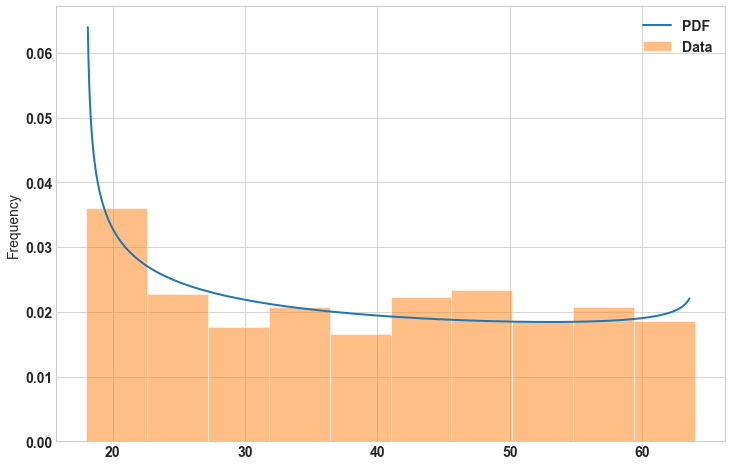

In [25]:
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=bins, density=True, alpha=0.5, label='Data', legend=True, ax=ax)


# Visualize Data

In [7]:
independent_variable = df.select_dtypes(include="number").columns.tolist()
independent_variable.remove("charges")
independent_variable

['age', 'bmi', 'children']

In [30]:
categorical_variable = df.select_dtypes(include="category").columns.tolist()
categorical_variable

['sex', 'smoker', 'region']

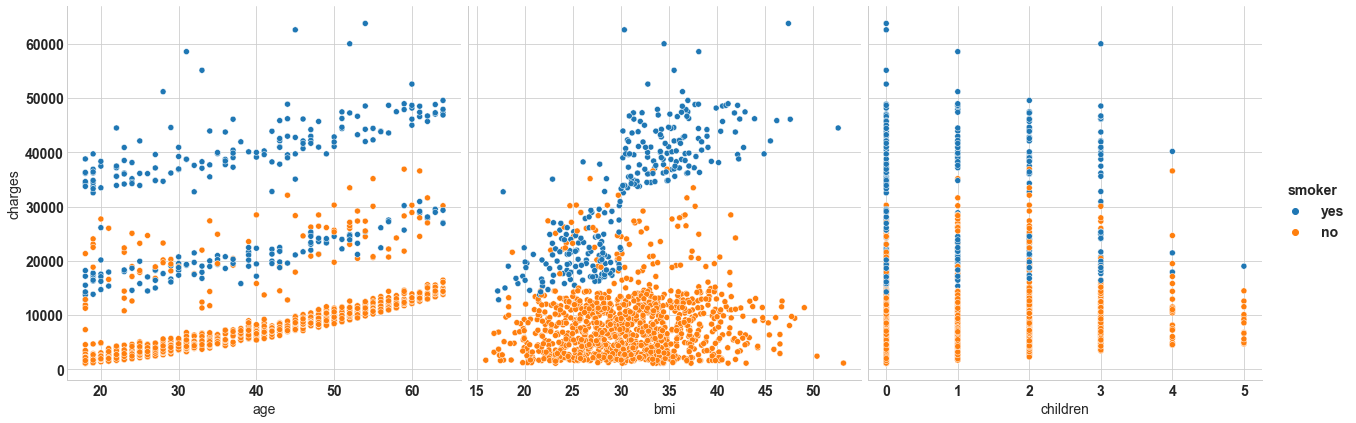

In [8]:
sns.pairplot(data=df,
             x_vars=independent_variable,
             y_vars=['charges'],
             height=6,
             aspect=1,
             hue="smoker")
plt.show()

**Points to note:**

1. There is clear distinguish between the smoker and non-smoker.
2. smokers get more health insurance than the non-smoker.
3. There is mixed region where some potion of smoker and non-smoker have similar amount of health insurance is charged.
4. We can see this trend across all three variable

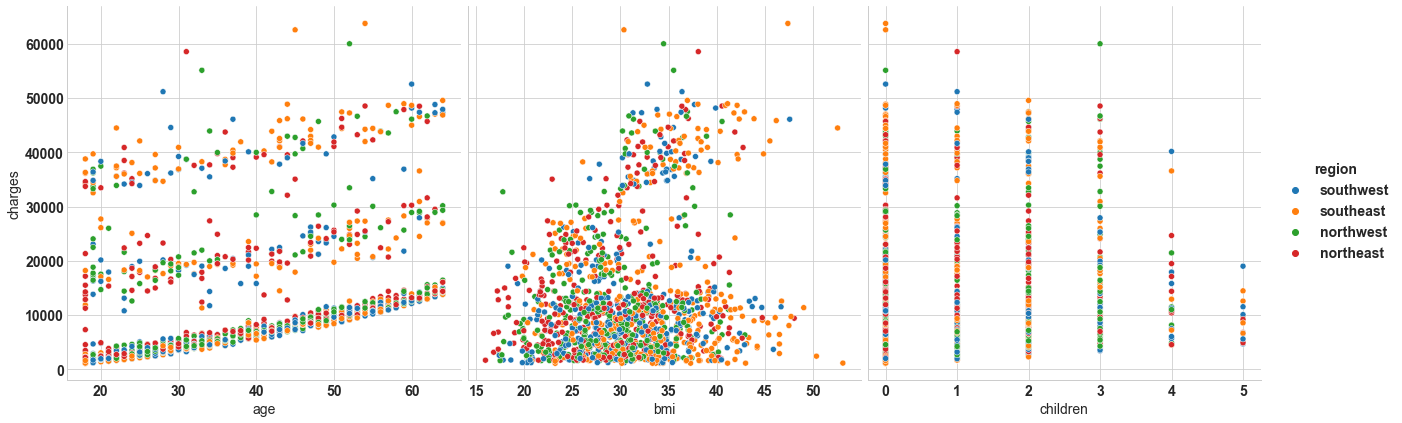

In [11]:
sns.pairplot(data=df,
             x_vars=independent_variable,
             y_vars=['charges'],
             height=6,
             aspect=1,
             hue="region")
plt.show()

There is no clear trend in the region across other variable

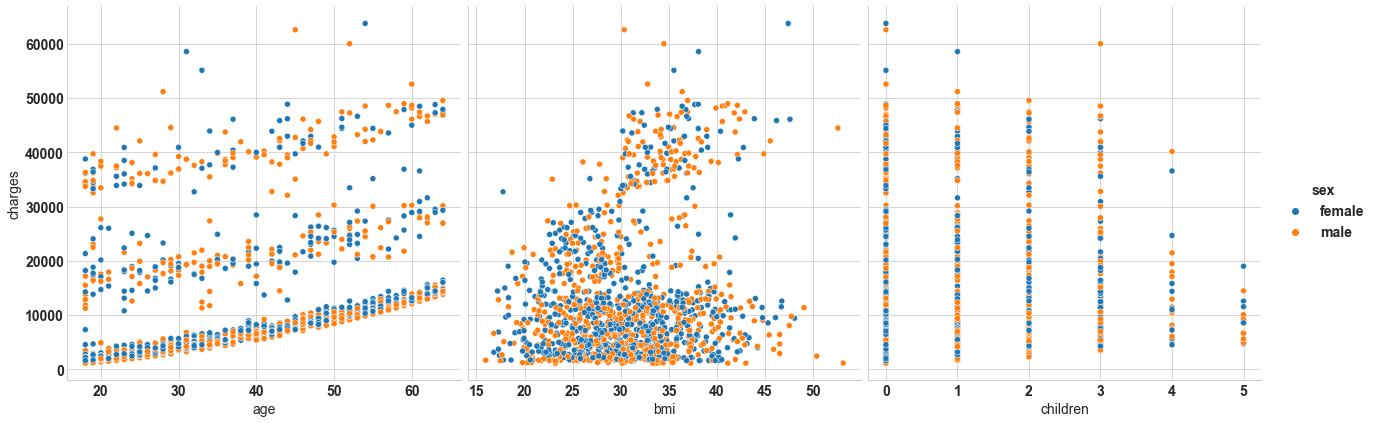

In [31]:
sns.pairplot(data=df,
             x_vars=independent_variable,
             y_vars=['charges'],
             height=6,
             aspect=1,
             hue="sex")
plt.show()

There is no clear trend in sex across other variable.

In [75]:
import itertools as it

In [80]:
list(it.combinations(categorical_variable,2))

[('sex', 'smoker'), ('sex', 'region'), ('smoker', 'region')]

In [114]:
df_category_combined = df.copy()
for a,b in it.combinations(categorical_variable,2):

    _dict = {a + "_" + b: lambda x: x[[a, b]].apply(tuple, axis=1)}
    df_category_combined = df_category_combined.assign( **_dict)

In [115]:
df_category_combined

,age,sex,bmi,children,smoker,region,charges,sex_smoker,sex_region,smoker_region
0,19,female,27.900,0,yes,southwest,16884.92400,"(female, yes)","(female, southwest)","(yes, southwest)"
1,18,male,33.770,1,no,southeast,1725.55230,"(male, no)","(male, southeast)","(no, southeast)"
2,28,male,33.000,3,no,southeast,4449.46200,"(male, no)","(male, southeast)","(no, southeast)"
3,33,male,22.705,0,no,northwest,21984.47061,"(male, no)","(male, northwest)","(no, northwest)"
4,32,male,28.880,0,no,northwest,3866.85520,"(male, no)","(male, northwest)","(no, northwest)"
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,"(male, no)","(male, northwest)","(no, northwest)"
1334,18,female,31.920,0,no,northeast,2205.98080,"(female, no)","(female, northeast)","(no, northeast)"
1335,18,female,36.850,0,no,southeast,1629.83350,"(female, no)","(female, southeast)","(no, southeast)"
1336,21,female,25.800,0,no,southwest,2007.94500,"(female, no)","(female, southwest)","(no, southwest)"


In [116]:
df_category_combined

,age,sex,bmi,children,smoker,region,charges,sex_smoker,sex_region,smoker_region
0,19,female,27.900,0,yes,southwest,16884.92400,"(female, yes)","(female, southwest)","(yes, southwest)"
1,18,male,33.770,1,no,southeast,1725.55230,"(male, no)","(male, southeast)","(no, southeast)"
2,28,male,33.000,3,no,southeast,4449.46200,"(male, no)","(male, southeast)","(no, southeast)"
3,33,male,22.705,0,no,northwest,21984.47061,"(male, no)","(male, northwest)","(no, northwest)"
4,32,male,28.880,0,no,northwest,3866.85520,"(male, no)","(male, northwest)","(no, northwest)"
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,"(male, no)","(male, northwest)","(no, northwest)"
1334,18,female,31.920,0,no,northeast,2205.98080,"(female, no)","(female, northeast)","(no, northeast)"
1335,18,female,36.850,0,no,southeast,1629.83350,"(female, no)","(female, southeast)","(no, southeast)"
1336,21,female,25.800,0,no,southwest,2007.94500,"(female, no)","(female, southwest)","(no, southwest)"


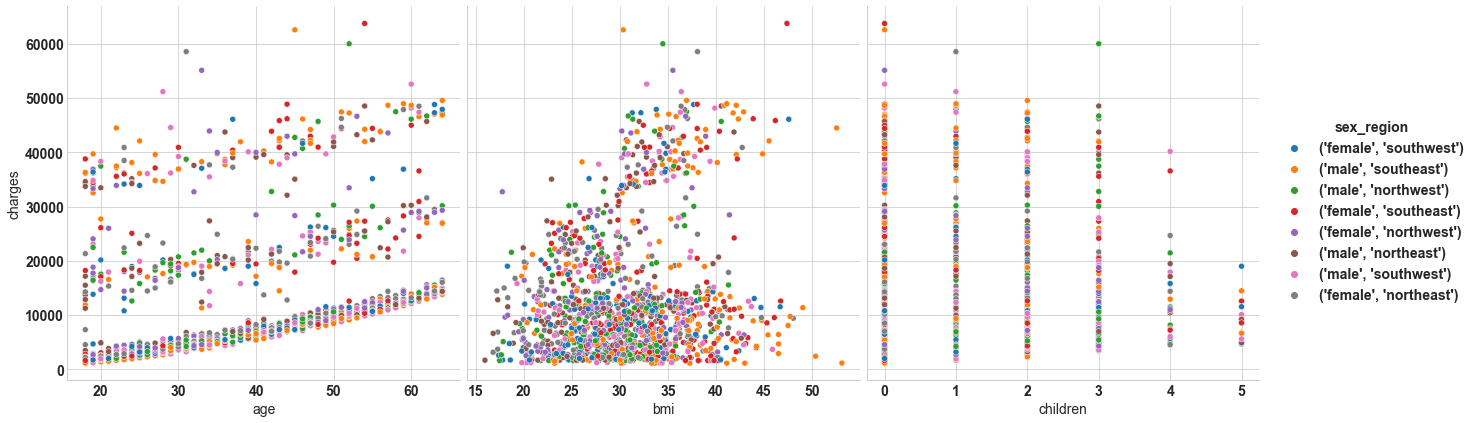

In [119]:
sns.pairplot(data=df_category_combined,
             x_vars = independent_variable,
             y_vars = "charges",
             height = 6,
             aspect =1,
             hue = "sex_region",

             )


plt.show()

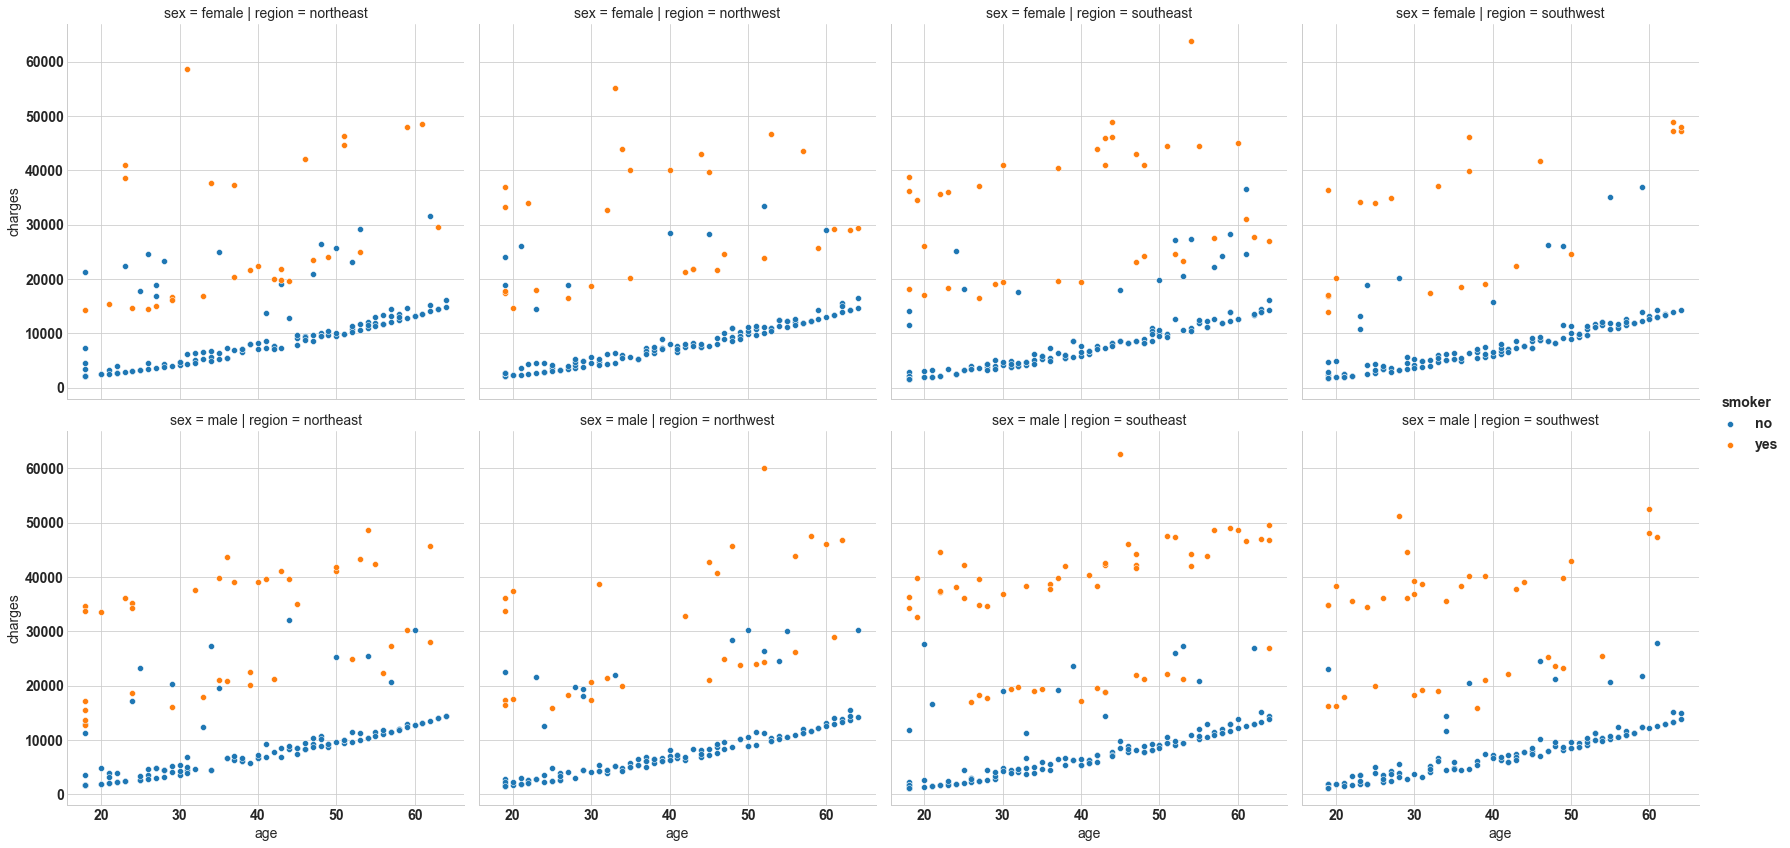

In [124]:
g = sns.FacetGrid(data=df,
              hue="smoker",
              row="sex",
                  col="region",
                  height=6,
                  aspect=1)
g.map(sns.scatterplot,"age","charges")
g.add_legend()

# Checking for missing value

Text(0.5, 1.0, 'Missing value in dataset')

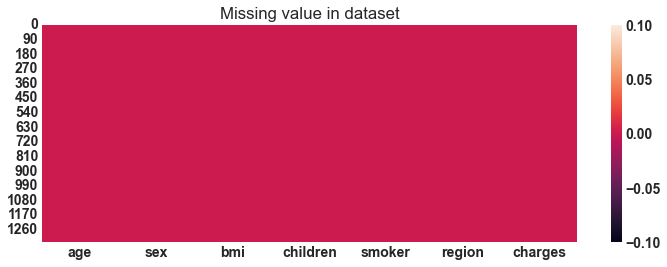

In [125]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull())
plt.title("Missing value in dataset")

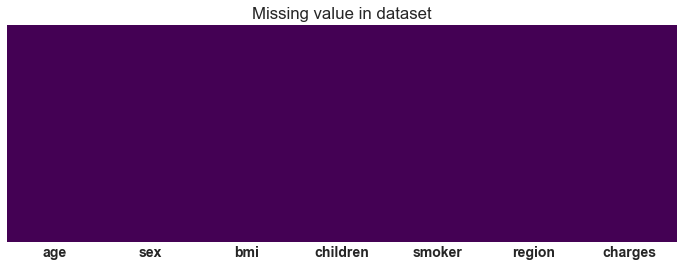

In [129]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.title("Missing value in dataset");

There is no missing data

# Plots

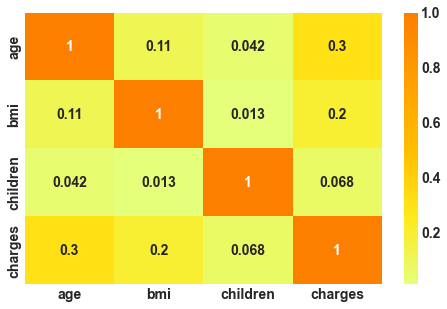

In [136]:
sns.heatmap(df.corr(),annot=True,cmap="Wistia");

|There is no correlation among variables

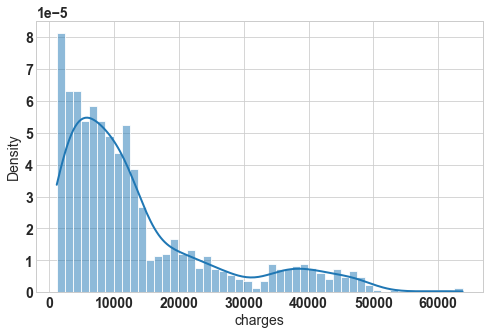

In [156]:
sns.histplot(df["charges"],
             stat="density",
             kde=True,
             bins=50,
             line_kws={"linewidth":2}
             );